# Mackay Ex. 29.13 

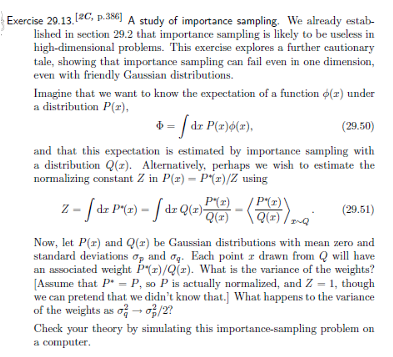



Reproduce the following plots:

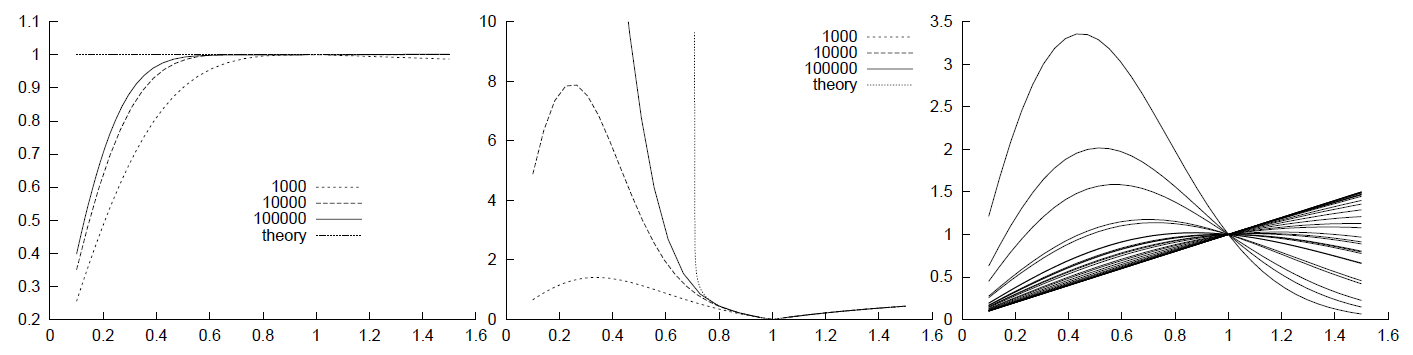

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

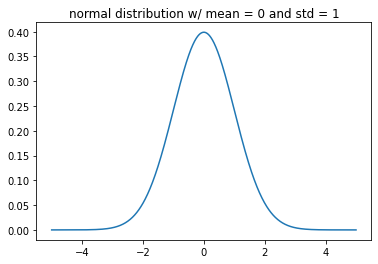

In [ ]:
x = np.linspace(-5,5,1000)
plt.plot(x,norm.pdf(x,0,1))
plt.title('normal distribution w/ mean = 0 and std = 1')
plt.show()

In [ ]:
def Q(x,Qmean,qsig):
  return norm.pdf(x,Qmean,qsig)

def P(x,Pmean,psig):
  return norm.pdf(x,Pmean,psig)

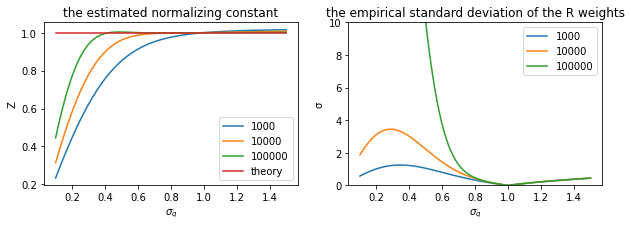

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
qsigs = np.linspace(0.1,1.5,100)

np.random.seed(7)
xlens = [1000,10000,100000]

for ii,i in enumerate(xlens):
  x = np.random.randn(i)
  
  Zvals = []
  stdvals = []
  weightvals = []

  for qsig in qsigs:
    xval = qsig * x
    weightvals.append(P(xval,0,1)/Q(xval,0,qsig))
    Zvals.append(np.mean(P(xval,0,1)/Q(xval,0,qsig)))
    stdvals.append(np.std(P(xval,0,1)/Q(xval,0,qsig)))

  ax[0].plot(qsigs,Zvals,label='{}'.format(xlens[ii]))
  ax[1].plot(qsigs,stdvals,label='{}'.format(xlens[ii]))

ax[0].plot(qsigs,np.ones(len(qsigs)),label='theory')

ax[0].set_xlabel('$\sigma_q$')
ax[0].set_ylabel('Z')
ax[0].set_title('the estimated normalizing constant')
ax[0].legend()

ax[1].set_xlabel('$\sigma_q$')
ax[1].set_ylabel('σ')
ax[1].set_title('the empirical standard deviation of the R weights')
ax[1].set_ylim([0,10])
ax[1].legend()

plt.show()

Text(0, 0.5, '$P(x)/Q(x)$')

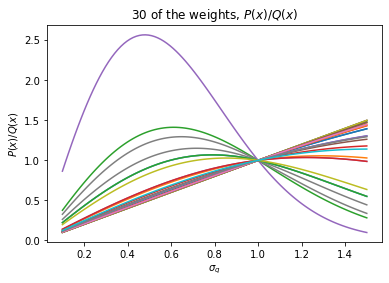

In [ ]:
np.random.seed(25)
fig,ax=plt.subplots()
perf = np.array(weightvals).T[np.random.randint(0,100,30)]
for i in range(len(perf)):
  ax.plot(qsigs,perf[i])

ax.set_title('30 of the weights, $P(x)/Q(x)$')
ax.set_xlabel('$\sigma_q$')
ax.set_ylabel('$P(x)/Q(x)$')
